In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import gmaps
# from api_keys import g_key
from ipywidgets.embed import embed_minimal_html

In [43]:
toronto= pd.read_csv('Toronto/Output/toronto_table.csv')
new_york=pd.read_csv('New York/Output/NY_table.csv')
montreal = pd.read_csv('montreal/Output/final_montreal.csv')

In [44]:
toronto

,Neighbourhood,Number of Collisions,Median Income,District,Population,City
0,Runnymede-Bloor West Village,3,93586.0,Toronto and East York,111006.0,Toronto
1,Mount Pleasant East,3,93566.0,Toronto and East York,11463.0,Toronto
2,Casa Loma,2,93022.0,Toronto and East York,31165.0,Toronto
3,Banbury-Don Mills/York Mills,9,90620.0,North York,38133.0,Toronto
4,Eringate-Centennial-West Deane,2,88872.0,Etobicoke York,22372.0,Toronto
...,...,...,...,...,...,...
85,Flemingdon Park,7,48917.0,Scarborough,43041.0,Toronto
86,Bay Street Corridor,6,48737.0,Toronto and East York,43466.0,Toronto
87,Weston,2,45696.0,Etobicoke York,29090.0,Toronto
88,Kensington-Chinatown,10,44216.0,Toronto and East York,17945.0,Toronto


In [45]:
new_york

,Neighbourhood,Number of Collisions,Median Income,Population,City
0,BRONX,63,47987.10,1432132,New York
1,BROOKLYN,142,70578.90,2582830,New York
2,MANHATTAN,91,103898.34,1628701,New York
3,QUEENS,148,81883.62,2278906,New York
4,STATEN ISLAND,26,99876.42,476179,New York


In [46]:
montreal = montreal.dropna(how='any')
montreal = montreal.drop('Unnamed: 0',axis=1)

In [47]:
montreal['Population'].astype(float)

0       32448.0
1       48899.0
2       18980.0
3        6973.0
4       20151.0
5       20276.0
6     1704694.0
7        3850.0
8        5050.0
9       31380.0
10       4958.0
11      20312.0
Name: Population, dtype: float64

In [48]:
toronto['Collisions per 1000 people']=(toronto['Number of Collisions']/toronto['Population'])*1000
toronto

,Neighbourhood,Number of Collisions,Median Income,District,Population,City,Collisions per 1000 people
0,Runnymede-Bloor West Village,3,93586.0,Toronto and East York,111006.0,Toronto,0.027026
1,Mount Pleasant East,3,93566.0,Toronto and East York,11463.0,Toronto,0.261712
2,Casa Loma,2,93022.0,Toronto and East York,31165.0,Toronto,0.064175
3,Banbury-Don Mills/York Mills,9,90620.0,North York,38133.0,Toronto,0.236016
4,Eringate-Centennial-West Deane,2,88872.0,Etobicoke York,22372.0,Toronto,0.089397
...,...,...,...,...,...,...,...
85,Flemingdon Park,7,48917.0,Scarborough,43041.0,Toronto,0.162636
86,Bay Street Corridor,6,48737.0,Toronto and East York,43466.0,Toronto,0.138039
87,Weston,2,45696.0,Etobicoke York,29090.0,Toronto,0.068752
88,Kensington-Chinatown,10,44216.0,Toronto and East York,17945.0,Toronto,0.557258


In [49]:
new_york['Collisions per 1000 people']=(new_york['Number of Collisions']/new_york['Population'])*1000
new_york

,Neighbourhood,Number of Collisions,Median Income,Population,City,Collisions per 1000 people
0,BRONX,63,47987.10,1432132,New York,0.043990
1,BROOKLYN,142,70578.90,2582830,New York,0.054978
2,MANHATTAN,91,103898.34,1628701,New York,0.055873
3,QUEENS,148,81883.62,2278906,New York,0.064943
4,STATEN ISLAND,26,99876.42,476179,New York,0.054601


In [50]:
montreal['Collisions per 1000 people']=(montreal['Number of Collisions']/montreal['Population'])*1000
montreal

,Neighbourhoods,Number of Collisions,Median Income,Population,City,Collisions per 1000 people
0,Côte-Saint-Luc,2.0,58935.0,32448.0,Montreal,0.061637
1,Dollard-Des Ormeaux,2.0,78981.0,48899.0,Montreal,0.040901
2,Dorval,3.0,64689.0,18980.0,Montreal,0.158061
3,Hampstead,2.0,122496.0,6973.0,Montreal,0.286821
4,Kirkland,2.0,115381.0,20151.0,Montreal,0.099251
5,Mont-Royal,1.0,109540.0,20276.0,Montreal,0.049319
6,Montréal,155.0,50227.0,1704694.0,Montreal,0.090925
7,Montréal-Est,2.0,50318.0,3850.0,Montreal,0.519481
8,Montréal-Ouest,2.0,115029.0,5050.0,Montreal,0.396040
9,Pointe-Claire,4.0,80242.0,31380.0,Montreal,0.127470


In [56]:
# Append all for a regression analysis
final_dataframe=toronto.append(new_york)
final_dataframe=final_dataframe.append(montreal)

,City,Collisions per 1000 people,District,Median Income,Neighbourhood,Neighbourhoods,Number of Collisions,Population
0,Toronto,0.027026,Toronto and East York,93586.0,Runnymede-Bloor West Village,NaN,3.0,111006.0
1,Toronto,0.261712,Toronto and East York,93566.0,Mount Pleasant East,NaN,3.0,11463.0
2,Toronto,0.064175,Toronto and East York,93022.0,Casa Loma,NaN,2.0,31165.0
3,Toronto,0.236016,North York,90620.0,Banbury-Don Mills/York Mills,NaN,9.0,38133.0
4,Toronto,0.089397,Etobicoke York,88872.0,Eringate-Centennial-West Deane,NaN,2.0,22372.0
...,...,...,...,...,...,...,...,...
7,Montreal,0.519481,NaN,50318.0,NaN,Montréal-Est,2.0,3850.0
8,Montreal,0.396040,NaN,115029.0,NaN,Montréal-Ouest,2.0,5050.0
9,Montreal,0.127470,NaN,80242.0,NaN,Pointe-Claire,4.0,31380.0
10,Montreal,0.403388,NaN,67200.0,NaN,Sainte-Anne-de-Bellevue,2.0,4958.0


The correlation coefficient is: -0.20705


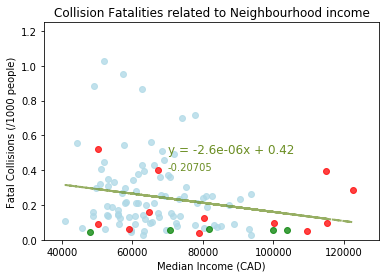

In [70]:
x_axis = toronto['Median Income']
y_axis = toronto['Collisions per 1000 people']
plt.scatter(x_axis,y_axis,c='lightblue',alpha=0.75)
x_axis = new_york['Median Income']
y_axis = new_york['Collisions per 1000 people']
plt.scatter(x_axis,y_axis,c='green',alpha=0.75)
x_axis = montreal['Median Income']
y_axis = montreal['Collisions per 1000 people']
plt.scatter(x_axis,y_axis,c='red',alpha=0.75)

plt.title('Collision Fatalities related to Neighbourhood income')
plt.xlabel('Median Income (CAD)')
plt.ylabel('Fatal Collisions (/1000 people)')
plt.xlim(35000,130000)
plt.ylim(0,1.25)


#regression analysis with complete data frame of all cities
regres_x=final_dataframe['Median Income']
regres_y=final_dataframe['Collisions per 1000 people']
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(regres_x,regres_y)
rvalue=round(rvalue,5)
regress_values = regres_x * slope + intercept
line_eq = "y = " + str(round(slope,7)) + "x + " + str(round(intercept,2))

best_fit = slope * regres_x + intercept
plt.plot(regres_x,best_fit,linestyle='--', c='olivedrab', lw=2,alpha=.7)
print(f"The correlation coefficient is: {rvalue}")

plt.annotate(line_eq,(70000,.5), fontsize=12,color='olivedrab')
plt.annotate(rvalue,(70000,.4), fontsize=10,color='olivedrab')
plt.savefig('Final_scatter.png')
plt.show()
